# Data Description

On this Notebook, an initial analysis of the data is proposed in junction with some cleaning processes on some columns. The resulted dataset is exported to be used on future notebooks.

## 1. Packages

First, the packages to be used on this notebook are imported.


In [1]:
import numpy as np 
import pandas as pd 
import inflection
import math
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('darkgrid')

## 2. Reading Data

On this section, the data is readed. The data used is composed by the 'train.csv', containing the main features about sales, and the 'store.csv' which involves additional features about the stores.

In [6]:
df_sales = pd.read_csv('../Data/train.csv')
df_store = pd.read_csv('../Data/store.csv')

C:\Users\andre_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = pd.merge(df_sales_raw, df_store_raw, how='left',on='Store')

In [4]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Each row os this dataset is composed by a combination of a store and a day, and it's features are related to the sales on that specific day.

## 3. Data Description Process

On this section, the proposed Data Description is implemented. For better readability, the process was divided is some sections.

### 3.1 Rename Columns

First, the columns are renamed following a snakecase convention.

In [7]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

In [8]:
snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

In [9]:
data.columns = cols_new

### 3.2 Data Dimensionality

Here, a simple dimensionality check is proposed.

In [7]:
print('Number of Rows: {}'.format(data.shape[0]))
print('Number of Columns: {}'.format(data.shape[1]))

NameError: name 'data' is not defined

### 3.3 NaN's

Here, NaN values are searched and filled on the data. First, we start by counting this values on each column.

In [13]:
data.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

For the "Competition Distance" column, the NaN values are substituted with a big distance, far from the maximum value (in this case 200000.o was used).

In [14]:
print('Valor Máximo da Coluna: {}'.format(data['competition_distance'].max()))

Valor Máximo da Coluna: 75860.0


In [15]:
data['competition_distance'] = data['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

The NaN values of the "Competition Open Since..." columns are filled with the actual month and year of the row.

In [16]:
data['competition_open_since_month'] = data.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

In [17]:
data['competition_open_since_year'] = data.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )

The same process used above is replicated on the "Promo 2 Since..." columns.

In [18]:
data['promo2_since_week'] = data.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

In [19]:
data['promo2_since_year'] = data.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

For the "Promo Interval" column, the month names are mapped to numbers, and NaN's are filled with zeros.

In [20]:
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [21]:
data['promo_interval'] = data['promo_interval'].fillna(0)
data['month_map'] = data['date'].dt.month.map(month_map)

Here, a simple suplementar column to "Promo Interval" is created, which is just a flag for indicating with the store is running a promotion on the day registered on the row.

In [22]:
data['is_promo'] = data[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0,axis=1)

Finally, a final check on the number of NaN's is made, to evaluate the operations done above.

In [23]:
data.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

### 3.4 Data Types

On this section, some columns have it's data types changed for a better performance on future notebooks. First, the original types are checked.

In [24]:
data.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

After that, on the next cells, some columns have their types changed.

In [11]:
data['date'] = pd.to_datetime(data['date'])

In [25]:
data['competition_open_since_month'] = data['competition_open_since_month'].astype('int64')
data['competition_open_since_year'] = data['competition_open_since_year'].astype('int64')

In [26]:
data['promo2_since_week'] = data['promo2_since_week'].astype('int64')
data['promo2_since_year'] = data['promo2_since_year'].astype('int64')

### 3.5 Statistical Description

Finally, on this section a simple statistical analysis is made on the data, separated for Numerical and Categorical features.

In [27]:
num_attributes = data.select_dtypes(include=['int64','float64'])
cat_attributes = data.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

For the Numerical Features, some aggregated statistics are calculated for each column and show as a DataFrame below.

In [28]:
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

In [29]:
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T

d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

In [30]:
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['atributes','min','max','range','mean','median','std','skew','kurtosis']

In [31]:
m

,atributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


For the Categorical Features, an analysis of the behaviour of some features during State Holidays are proposed with the use of a Box Plot. There, it is possible to see some variability in Sales according to Assortments and Store Type.

In [32]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      5
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [33]:
aux1 = data[(data['state_holiday'] != '0') & (data['state_holiday'] != 0) & (data['sales'] > 0)]

<AxesSubplot:xlabel='assortment', ylabel='sales'>

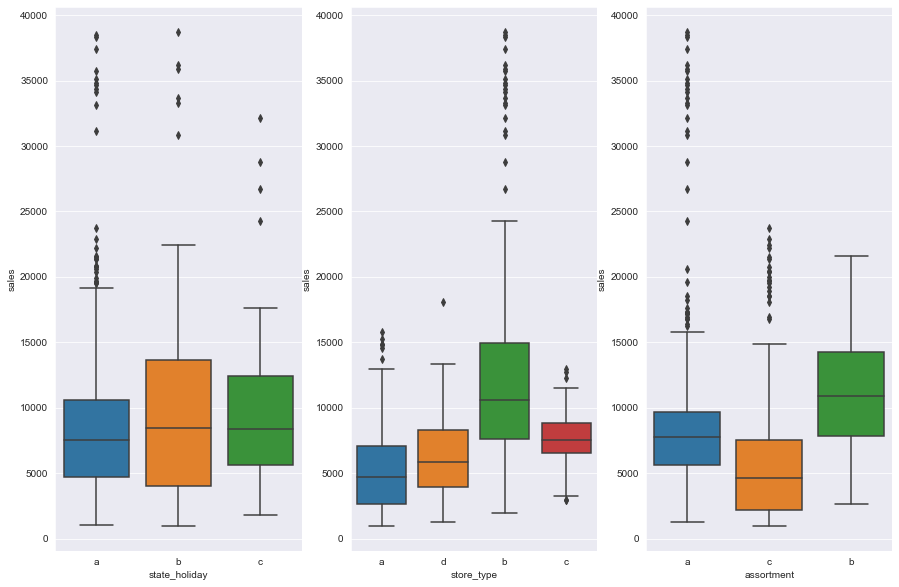

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.boxplot(x = 'state_holiday', y = 'sales', data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x = 'store_type', y = 'sales', data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x = 'assortment', y = 'sales', data=aux1)

## Data Exporting

On this final section, the resulting data from this process is exported to be used on subsequent notebooks. To maintain the proposed changes on data types, the pickle format is adopted throughout this work.

In [36]:
data.to_pickle('../Data/data_clean.pkl')